### 1. 介绍 Introduction
-------------

LeNet是由Yann LeCun等人在1998年提出的经典卷积神经网络（CNN）,架构如下图。论文地址：
[LeNet](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf)

In [1]:
from IPython.display import Image, display
url = 'https://production-media.paperswithcode.com/methods/LeNet_Original_Image_48T74Lc.jpg'
display(Image(url=url, width=600))

### 2. 数学表达 mathematical expressions
------------

- 输入：$X\in \mathbb{R}^{32\times 32\times 1}$
- 卷积C1：采用了6个5×5×1大小的卷积核，即$ k=6$

  $ C_{1k} = \sum_{m=1}^5\sum_{n=1}^5 W_k(m,n)\cdot X(i+m,j+n)+b_k \in \mathbb{R}^{28\times 28\times 6} $

  sigmoid激活：$  \sigma(C_1) \in \mathbb{R}^{28\times 28\times 6}$
- 平均池化S2：$ S_2 = mean(\sigma(C_1), 2\times 2) \in \mathbb{R}^{14\times 14\times 6}$

- 卷积C3：采用了16个5×5×6大小的卷积核，即$ k=16$
  
  $ C_{3k} = \sum_{m=1}^5\sum_{n=1}^5 \sum_{l=1}^6 W_k(m,n, l)\cdot X(i+m,j+n, h+l)+b_k \in \mathbb{R}^{10 \times 10 \times 16} $

  激活sigmoid：$\sigma(C_3) \in \mathbb{R}^{10 \times 10 \times 16} $
- 平均池化S4：$ S_4 = max(\sigma(C_3), 2\times 2) \in \mathbb{R}^{5 \times 5 \times 16} $

- 全连接C5：$ C_5=W_{120\times 400}\cdot vec(S_4)+b_{400\times 1}\in \mathbb{R}^{120 \times 1}$

  sigmoid激活：$ \sigma(C_5)\in \mathbb{R}^{120 \times 1} $
- 全连接F6：$F_6 = W_{84\times 120} \cdot \sigma(C_5) + b_{84\times 1}\in \mathbb{R}^{84\times 1} $

  sigmoid激活：$\sigma(F_6)$
- 全连接F7：$ F_7= W_{10\times 84} \cdot \sigma(F_6) + b_{10\times 1}\in \mathbb{R}^{10\times 1} $

  高斯激活：$ RBF(F_7) $

  $RBF = exp(-\beta \cdot ||x-w_i||^2)$ 
- 输出：$\mathbb{R}^{10\times 1}$

### 3. 原始实现
----------------

In [118]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
import torch.nn.functional as F

In [164]:
batch_size = 256
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

lr = 1e-3
epochs = 20

In [120]:
# 定义数据转换方法
transform = transforms.Compose([transforms.Resize((32,32)), 
                                transforms.ToTensor(), 
                                transforms.Normalize((0.1307,),(0.3081,))])
# 定义训练集
train_dataset = torchvision.datasets.MNIST(root = './data',
                                          train = True,
                                          transform = transform,
                                          download = True)
# 定义测试集
test_dataset = torchvision.datasets.MNIST(root = './data',
                                         train = False,
                                         transform = transform,
                                         download = True)

# 加载训练数据，并打乱
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
# 加载测试数据
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

torch.Size([256, 1, 32, 32]) torch.Size([256]) tensor([8, 5, 5, 7, 9, 7, 6, 2, 8, 1, 6, 2, 1, 0, 1, 9, 1, 3, 0, 1, 0, 5, 6, 7,
        2, 8, 1, 2, 5, 7, 9, 4, 7, 2, 8, 1, 4, 5, 9, 8, 8, 3, 1, 7, 9, 9, 9, 2,
        1, 8, 2, 3, 6, 9, 1, 7, 3, 1, 6, 4, 6, 9, 3, 0, 9, 0, 2, 3, 1, 8, 0, 5,
        5, 1, 4, 4, 0, 0, 8, 9, 7, 5, 9, 4, 0, 1, 2, 1, 0, 6, 4, 2, 1, 2, 2, 8,
        8, 5, 1, 3, 4, 1, 9, 6, 7, 8, 5, 7, 8, 1, 7, 1, 8, 1, 1, 3, 1, 0, 0, 6,
        7, 1, 5, 3, 8, 9, 9, 5, 6, 4, 8, 5, 3, 3, 0, 9, 1, 5, 5, 9, 9, 9, 5, 1,
        9, 7, 7, 3, 6, 8, 6, 9, 4, 6, 4, 9, 7, 4, 9, 3, 6, 5, 4, 9, 1, 0, 2, 5,
        4, 6, 7, 5, 1, 7, 4, 8, 8, 1, 3, 6, 5, 5, 9, 4, 5, 5, 1, 3, 0, 7, 8, 0,
        0, 5, 8, 2, 5, 6, 3, 1, 8, 5, 3, 7, 4, 3, 8, 4, 7, 5, 7, 8, 8, 5, 5, 4,
        9, 5, 0, 6, 3, 3, 2, 9, 6, 6, 5, 2, 6, 6, 7, 8, 2, 3, 7, 7, 8, 0, 5, 8,
        8, 4, 8, 9, 6, 2, 2, 9, 4, 7, 2, 7, 2, 8, 3, 9])


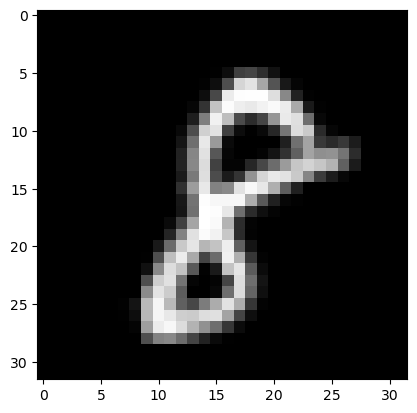

In [121]:
import matplotlib.pyplot as plt
image, label = next(iter(train_loader))
print(image.shape, label.shape, label)
plt.imshow(image[0][0], cmap='gray')

In [122]:
class OriginalLeNet5(nn.Module): # 定义类，继承自pytorch的nn.Module基类
    def __init__(self, num_classes=10, beta=1.0): # 初始化
        super(OriginalLeNet5, self).__init__() # 显示调用父类的构造方法
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0) # 输入通道1，输出通道6，步幅1，填充0
        self.avgpool1 = nn.AvgPool2d(kernel_size=2, stride=2) # 平均池化，2×2核，步幅2
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0) # 输入通道6，输出通道16，步幅1，填充0
        self.avgpool2 = nn.AvgPool2d(kernel_size=2, stride=2) # 平均池化，2×2核，步幅2
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # 第一个全连接层，输出120
        self.fc2 = nn.Linear(120, 84) #第二个全连接层，输出84
        self.fc3 = nn.Linear(84, num_classes) #第三个全连接层，输出10

        self.beta = beta #RBF超参数
        self.sigmoid = nn.Sigmoid() # sigmoid激活函数

    def forward(self, x):
        x = self.sigmoid(self.conv1(x))
        x = self.avgpool1(x)
        x = self.sigmoid(self.conv2(x))
        x = self.avgpool2(x)

        x = x.view(-1, 16 * 5 * 5)
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        # output = self.fc3(x)

        # 采用高斯激活
        prototypes = self.fc3.weight
        x = x.unsqueeze(1)
        distance = torch.norm(x - prototypes, dim=2, p=2)
        output = torch.exp(-self.beta * distance.pow(2))

        return output

In [166]:
model = OriginalLeNet5()
model = model.cuda()
criterion = nn.MSELoss(reduction='sum')
optimizer = optim.Adam(model.parameters(), lr=lr)

In [132]:
# 定义训练函数
def train(epoch):
    model.train()
    train_loss = 0
    correct_num = 0
    total_num = 0
    
    # 遍历训练数据
    for data, label in train_loader:
        data, label = data.cuda(), label.cuda() # 将数据和标签挪到GPU        
        optimizer.zero_grad() # 梯度清理
        output = model(data) # 前向传播

        # 将标签转化为one-hot编码
        batch_size = label.size(0)
        label_one_hot = torch.zeros(batch_size, 10).cuda()
        label_one_hot.scatter_(1, label.unsqueeze(1), 1)
        
        loss = criterion(output, label_one_hot) # 计算损失，也就是预测结果和真实标签的误差
        loss.backward() # 反向传播，计算梯度
        optimizer.step() # 更新一步参数
        
        train_loss += loss.item() #计算损失
        preds = torch.argmax(output, dim=1)
        correct_num += torch.eq(preds, label).sum().item() # 预测正确数量
        total_num += data.size(0) # 总预测数量
    train_loss = train_loss/len(train_loader.dataset) # 计算平均训练损失
    accuracy = correct_num/total_num # 计算准确率
    print(f'Epoch:{epoch}\tTraining Loss:{train_loss:.6f}, Accuracy:{accuracy:.6f}') # 输出信息

In [133]:
# 定义验证函数并初始化
def evaluate(epoch): 
    model.eval() # 验证模式
    evaluate_loss = 0 #累积验证损失
    correct_num = 0 
    total_num = 0 
    
    # 禁用梯度
    with torch.no_grad():
        # 遍历测试数据
        for data, label in test_loader: 
            data, label = data.cuda(), label.cuda() #数据迁移到GPU            
            output = model(data) # 前向传播

            # 转换测试标签为one-hot编码
            batch_size = label.size(0)
            label_one_hot = torch.zeros(batch_size, 10).cuda()
            label_one_hot.scatter_(1, label.unsqueeze(1), 1)
            
            loss = criterion(output, label_one_hot) # 计算当前批次损失
            evaluate_loss += loss.item() # 累积总损失
            preds = torch.argmax(output, dim=1) # 取得每行最大值的索引，获取预测结果。
            correct_num += torch.eq(preds, label).sum().item() # 预测正确数量
            total_num += data.size(0) # 总预测数量
    evaluate_loss = evaluate_loss/total_num # 计算平均验证损失
    accuracy = correct_num/total_num # 计算准确率
    print(f'Epoch:{epoch}\tValidation Loss:{evaluate_loss:.6f}, Accuracy:{accuracy:.6f}') #打印输出信息

In [135]:
for epoch in range(1, epochs+1):
    train(epoch)
    evaluate(epoch)

Epoch:1	Training Loss:0.899994, Accuracy:0.109333
Epoch:1	Validation Loss:0.899686, Accuracy:0.113500
Epoch:2	Training Loss:0.700318, Accuracy:0.401783
Epoch:2	Validation Loss:0.298925, Accuracy:0.829600
Epoch:3	Training Loss:0.191958, Accuracy:0.890250
Epoch:3	Validation Loss:0.143211, Accuracy:0.919100
Epoch:4	Training Loss:0.131826, Accuracy:0.925217
Epoch:4	Validation Loss:0.114010, Accuracy:0.935700
Epoch:5	Training Loss:0.107524, Accuracy:0.939733
Epoch:5	Validation Loss:0.095248, Accuracy:0.946900
Epoch:6	Training Loss:0.090756, Accuracy:0.950900
Epoch:6	Validation Loss:0.080909, Accuracy:0.957500
Epoch:7	Training Loss:0.078437, Accuracy:0.959117
Epoch:7	Validation Loss:0.071199, Accuracy:0.963500
Epoch:8	Training Loss:0.069164, Accuracy:0.964667
Epoch:8	Validation Loss:0.063153, Accuracy:0.967800
Epoch:9	Training Loss:0.062191, Accuracy:0.968467
Epoch:9	Validation Loss:0.058382, Accuracy:0.971100
Epoch:10	Training Loss:0.056787, Accuracy:0.972533
Epoch:10	Validation Loss:0.0531

### 4. 现代实现
-------------------

主要修改内容
- 采用最大池化（max pooling），而不是平均池化
- 在每次卷积之后进行批归一化（Batch Normalization）
- 采用ReLU作为激活函数
- 使用交叉熵作为损失函数

In [152]:
modern_LeNet5 = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=0), 
    nn.BatchNorm2d(6),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    
    nn.Conv2d(6, 16, kernel_size=5, padding=0), 
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120), 
    nn.ReLU(),
    nn.Linear(120, 84), 
    nn.ReLU(),
    nn.Linear(84, 10)
)

In [165]:
model = modern_LeNet5
model = model.cuda()
criterion = nn.CrossEntropyLoss(reduction='sum')
optimizer = optim.Adam(model.parameters(), lr=lr)

In [154]:
# 定义训练函数
def train(epoch):
    model.train()
    train_loss = 0
    correct_num = 0
    total_num = 0
    
    # 遍历训练数据
    for data, label in train_loader:
        data, label = data.cuda(), label.cuda() # 将数据和标签挪到GPU        
        optimizer.zero_grad() # 梯度清理
        output = model(data) # 前向传播
       
        loss = criterion(output, label) # 计算损失，也就是预测结果和真实标签的误差
        loss.backward() # 反向传播，计算梯度
        optimizer.step() # 更新一步参数
        
        train_loss += loss.item() #计算损失
        preds = torch.argmax(output, dim=1)
        correct_num += torch.eq(preds, label).sum().item() # 预测正确数量
        total_num += data.size(0) # 总预测数量
    train_loss = train_loss/len(train_loader.dataset) # 计算平均训练损失
    accuracy = correct_num/total_num # 计算准确率
    print(f'Epoch:{epoch}\tTraining Loss:{train_loss:.6f}, Accuracy:{accuracy:.6f}') # 输出信息

In [155]:
# 定义验证函数并初始化
def evaluate(epoch): 
    model.eval() # 验证模式
    evaluate_loss = 0 #累积验证损失
    correct_num = 0 
    total_num = 0 
    
    # 禁用梯度
    with torch.no_grad():
        # 遍历测试数据
        for data, label in test_loader: 
            data, label = data.cuda(), label.cuda() #数据迁移到GPU            
            output = model(data) # 前向传播
            
            loss = criterion(output, label) # 计算当前批次损失
            evaluate_loss += loss.item() # 累积总损失
            preds = torch.argmax(output, dim=1) # 取得每行最大值的索引，获取预测结果。
            correct_num += torch.eq(preds, label).sum().item() # 预测正确数量
            total_num += data.size(0) # 总预测数量
    evaluate_loss = evaluate_loss/total_num # 计算平均验证损失
    accuracy = correct_num/total_num # 计算准确率
    print(f'Epoch:{epoch}\tValidation Loss:{evaluate_loss:.6f}, Accuracy:{accuracy:.6f}') #打印输出信息

In [ ]:
for epoch in range(1, epochs+1):
    train(epoch)
    evaluate(epoch)

### 5. 收获
-------------

LeNet带来了如下经验：
- 理解卷积：平移不变性 + 共享权重
- 池化层局部不变性，增加稳定性
- 算法：反向传播
- 具备后续卷积神经网络的全部要素：卷积层、池化层、全连接层